# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

from xopt.bayesian.algorithms import bayesian_exploration

# test function
from xopt.evaluators import test_TNK
?bayesian_exploration

Signature:
bayesian_exploration(
    vocs,
    evaluate_f,
    n_steps=1,
    n_initial_samples=1,
    output_path=None,
    custom_model=None,
    executor=None,
    restart_file=None,
    initial_x=None,
    verbose=True,
    generator_options=None,
)
Docstring:
Bayesian Exploration

Parameters
----------
vocs : dict
    Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

evaluate_f : callable
    Returns dict of outputs after problem has been evaluated

n_steps : int, default = 1
    Number of optimization steps to execute

n_initial_samples : int, defualt = 1
    Number of initial samples to take before using the model, overwritten by initial_x

output_path : str, default = ''
    Path location to place outputs

custom_model : callable, optional
    Function of the form f(train_inputs, train_outputs) that returns a trained custom model

executor : Executor, optional
    Executor object to run evaluate_f

restart_file : str, optional
    Fi

In [2]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

n_steps = 30
generator_options = {}


if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=n_steps,                       ## number of optimization step
                               generator_options=generator_options,
                               verbose=True)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x0000027B698033A0>
submitting initial candidates at time 2021-09-01T11:45:57-05:00
starting optimization loop
Model creation time: 0.2353 s
Candidate generation time: 0.675 s
Candidate(s): tensor([[0.0000, 1.2418]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:45:58-05:00
Model creation time: 0.243 s
Candidate generation time: 0.6251 s
Candidate(s): tensor([[0., 0.]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:45:59-05:00
Model creation time: 0.265 s
Candidate generation time: 0.742 s
Candidate(s): tensor([[1.4300, 0.0000]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:46:00-05:00
Model creation time: 0.258 s
Candidate generation time: 0.7145 s
Candidate(s): tensor([[0.9841, 0.7188]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:46:01-05:00
Model creation time: 0.364 s
Candidate gener

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraints', 'corrected_constraints', 'constraint_status', 'feasibility', 'model'])


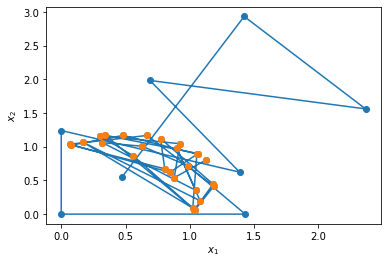

In [3]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [4]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK
n_steps = 30

generator_options = {'sigma': torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                     #'batch_size': 5,                       ## Specify batched exploration
                     # 'custom_model': myCustomModel,        ## Specify custom model creation function
                     # 'use_gpu': False,                         ## Use GPU (if available)
                    }
if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               generator_options = generator_options,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=n_steps,                       ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               verbose=True)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x0000027B69A0C7F0>
submitting initial candidates at time 2021-09-01T11:46:49-05:00
starting optimization loop
Model creation time: 0.239 s
Candidate generation time: 0.728 s
Candidate(s): tensor([[0.6863, 1.0580]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:46:50-05:00
Model creation time: 0.4225 s
Candidate generation time: 0.7101 s
Candidate(s): tensor([[0.3997, 1.1626]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:46:51-05:00
Model creation time: 0.4889 s
Candidate generation time: 0.786 s
Candidate(s): tensor([[0.9103, 0.8217]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:46:52-05:00
Model creation time: 0.428 s
Candidate generation time: 0.7326 s
Candidate(s): tensor([[1.0772, 0.5959]], dtype=torch.float64)
submitting candidates at time 2021-09-01T11:46:53-05:00
Model creation time: 0.657 s
Candid

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraints', 'corrected_constraints', 'constraint_status', 'feasibility', 'model'])


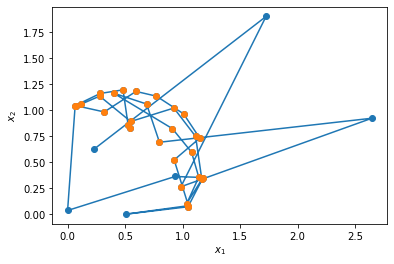

In [5]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')